<a href="https://colab.research.google.com/github/Ahauya/Data-Science-projects/blob/main/Stock_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Prediticting Stock prices using Long short t Mermory 

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
## Yahoo finance Ticker for your symbol
stock_symbol = "TSLA"

In [ ]:
# Last 5 years data with interval of day 1
data = yf.download(tickers= stock_symbol,period="5y", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:

data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,899.979980,900.000000,821.700012,877.510010,877.510010,41649500
2022-04-29,902.250000,934.400024,870.000000,870.760010,870.760010,29313400
2022-05-02,860.770020,906.359985,848.030029,902.940002,902.940002,25260500
2022-05-03,903.179993,924.080017,888.590027,909.250000,909.250000,21236500
2022-05-04,903.940002,955.500000,885.280029,952.619995,952.619995,27124700


In [ ]:
len(data)

1259

In [ ]:
opn = data[["Open"]]

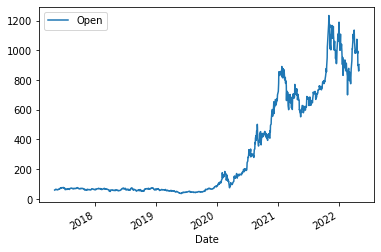

In [ ]:
opn.plot()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
da = opn.values

In [ ]:
da

array([[ 59.59999847],
       [ 62.18000031],
       [ 61.87599945],
       ...,
       [860.77001953],
       [903.17999268],
       [903.94000244]])

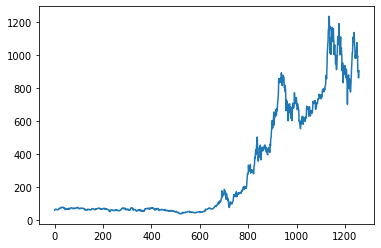

In [ ]:
plt.plot(da)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [ ]:
## Using MinMaxScaler for normalization data
normalizer = MinMaxScaler(feature_range= (0,1))
da_scaled = normalizer.fit_transform(np.array(da).reshape(-1,1))

In [ ]:
len(da_scaled), len(da)

(1259, 1259)

In [ ]:
# Data training size 
train_size = int(len(da_scaled) * 0.70)
test_size = len(da_scaled) - train_size

In [ ]:
train_size, test_size

(881, 378)

In [ ]:
# Splitting the dataset between train and test
da_train,da_test = da_scaled[0:train_size,:], da_scaled[train_size:len(da_scaled),:1]

In [ ]:
# Creating dataset in time series for LSTM model
def create_da(dataset, step):
  xtrain, ytrain = [], []
  for i in range (len(dataset)-step-1):
    a = dataset [i:(i + step), 0]
    xtrain.append(a)
    ytrain.append(dataset[i + step , 0])
    return np.array(xtrain), np.array(ytrain)


In [ ]:
# taking 100 days prices as one record fro traning
time_stamp =100
x_train,y_train =create_da(da_train,time_stamp)
x_test, y_test = create_da(da_test,time_stamp)

In [ ]:
x_train.shape

(1, 100)

In [ ]:
#Shaping the data to fit LSTM MOdel
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1], 1)
x_test= x_test.reshape(x_test.shape [0], x_test.shape[1], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
from pandas.core.algorithms import mode
#Creating LSTM using Keras 
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape [1],1)))
model.add(LSTM(units =50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units =1 , activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model with Adam optimizer and mean squered error loss function
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64)

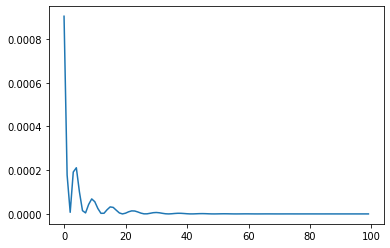

In [ ]:
loss= model.history.history["loss"]
plt.plot(loss)

In [ ]:
#Predicting onTrain and Test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#inverse tranform to got actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)


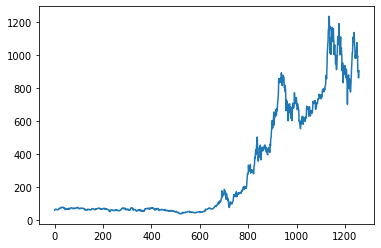

In [ ]:
# Camparing using values 
plt.plot (normalizer.inverse_transform(da_scaled))
plt.plot(train_predict)
plt.plot (test_predict)

In [ ]:
#Getting the last 100 records 
fut_inp =da_test[270:]

In [ ]:
fut_inp =fut_inp.reshape (1,-1)

In [ ]:
tmp_inp = list(fut_inp)

In [ ]:
fut_inp.shape

(1, 108)

In [ ]:
tmp_inp = tmp_inp[0].tolist()


In [ ]:
from re import VERBOSE
lst_output =[]
n_steps =100
i=0
while (i < 30):
  if (len(tmp_inp)>100):
    fut_inp =np.array(tmp_inp[1:])
    fut_inp = fut_inp.reshape(1,-1)
    fut_inp = fut_inp.reshape(1, n_steps,1)
    yhat=model.predict(fut_inp,verbose=0)
    tmp_inp.extend(yhat[0].tolist())
    tmp_inp =tmp_inp[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      fut_inp = fut_inp.reshape((1,n_steps,1))
      yhat =model.redict(fut_inp, VERBOSE=0)
      tmp_inp.extend(yhat[0].tolist())
      lst_output.extend(yhat.tolist())
      i = i+1

print(lst_output)

ValueError: ignored

In [ ]:
len(da_scaled)

1259

In [ ]:
plot_new = np.arange(1,100)
plot_pred = np.arange(101,131)

ValueError: ignored

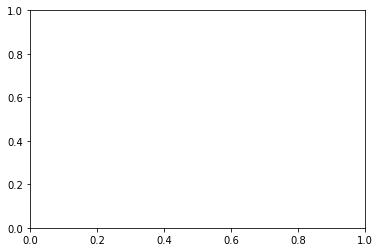

In [ ]:
plt.plot(plot_new, normalizer.inverse_transform(da_scaled[1132:]))
plt.plot(plot_pred, normalizer.inverse_transform (lst_output))

In [ ]:
da_new =da_scaled.tolist()

In [ ]:
len(da_new)

1259

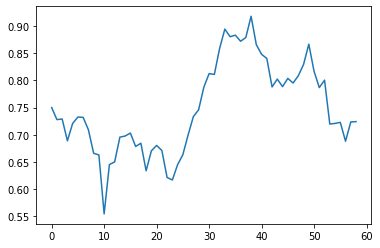

In [ ]:
da_new.extend(lst_output)
plt.plot(da_new[1200:])

In [ ]:
final_graph = normalizer.inverse_transform(da_new).tolist()

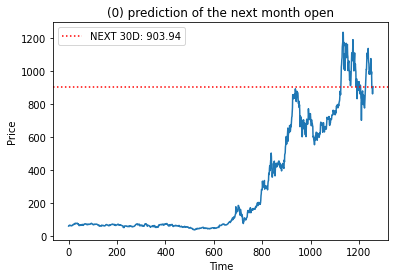

In [ ]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("(0) prediction of the next month open". format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()